# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

#units= "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind =city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | luorong
Processing Record 3 of Set 1 | sakassou
Processing Record 4 of Set 1 | palikir - national government center
Processing Record 5 of Set 1 | changyon
Processing Record 6 of Set 1 | labytnangi
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | moranbah
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mongo
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | mont-dore
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | yangor
City not found. Skipping...
Processing Record 17 of Set 1 | happy valley-goose bay
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | nuku'alofa
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | lihue
Pr

Processing Record 38 of Set 4 | kotovo
Processing Record 39 of Set 4 | udachny
Processing Record 40 of Set 4 | st. john's
Processing Record 41 of Set 4 | kingston
Processing Record 42 of Set 4 | beyneu
Processing Record 43 of Set 4 | arkhangel'sk
Processing Record 44 of Set 4 | puerto natales
Processing Record 45 of Set 4 | saint-pierre
Processing Record 46 of Set 4 | mejit
Processing Record 47 of Set 4 | inekar
City not found. Skipping...
Processing Record 48 of Set 4 | yugorsk
Processing Record 49 of Set 4 | tamanrasset
Processing Record 0 of Set 5 | whakatane
Processing Record 1 of Set 5 | cidade velha
Processing Record 2 of Set 5 | pieksamaki
Processing Record 3 of Set 5 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 4 of Set 5 | matamey
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | shahecheng
Processing Record 7 of Set 5 | gaalkacyo
Processing Record 8 of Set 5 | pemba
Processing Record 9 of Set 5 | taroudant
Processing 

Processing Record 25 of Set 8 | wanning
Processing Record 26 of Set 8 | mahabe
City not found. Skipping...
Processing Record 27 of Set 8 | zaigrayevo
Processing Record 28 of Set 8 | brooks
Processing Record 29 of Set 8 | imbituba
Processing Record 30 of Set 8 | kenora
Processing Record 31 of Set 8 | luz
Processing Record 32 of Set 8 | jabor
Processing Record 33 of Set 8 | eura
Processing Record 34 of Set 8 | riviere-du-loup
Processing Record 35 of Set 8 | itoman
Processing Record 36 of Set 8 | konarka
Processing Record 37 of Set 8 | lima
Processing Record 38 of Set 8 | nemuro
Processing Record 39 of Set 8 | minas de marcona
Processing Record 40 of Set 8 | trairi
Processing Record 41 of Set 8 | sao jose da coroa grande
Processing Record 42 of Set 8 | santana
Processing Record 43 of Set 8 | sallisaw
Processing Record 44 of Set 8 | agara
Processing Record 45 of Set 8 | tralee
Processing Record 46 of Set 8 | er regueb
Processing Record 47 of Set 8 | fort mcmurray
Processing Record 48 of Se

Processing Record 12 of Set 12 | luena
Processing Record 13 of Set 12 | cox's bazar
Processing Record 14 of Set 12 | sungai penuh
Processing Record 15 of Set 12 | el jadid
Processing Record 16 of Set 12 | alice springs
Processing Record 17 of Set 12 | warrenton
Processing Record 18 of Set 12 | paita
Processing Record 19 of Set 12 | matane
Processing Record 20 of Set 12 | conceicao do araguaia
Processing Record 21 of Set 12 | alotau
City not found. Skipping...
Processing Record 22 of Set 12 | aripuana
Processing Record 23 of Set 12 | evanston
Processing Record 24 of Set 12 | wau
Processing Record 25 of Set 12 | puerto baquerizo moreno
Processing Record 26 of Set 12 | bulgan
Processing Record 27 of Set 12 | joacaba
Processing Record 28 of Set 12 | yulinshi
Processing Record 29 of Set 12 | chonchi
Processing Record 30 of Set 12 | ba
City not found. Skipping...
Processing Record 31 of Set 12 | concepcion
Processing Record 32 of Set 12 | same
Processing Record 33 of Set 12 | robertsport
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,62.65,84,0,5.39,US,1695171665
1,luorong,24.4058,109.6086,82.67,80,9,7.07,CN,1695171864
2,sakassou,7.4546,-5.2926,71.89,97,100,3.20,CI,1695171864
3,palikir - national government center,6.9248,158.1611,86.85,74,100,8.05,FM,1695171864
4,changyon,38.2508,125.0961,62.51,93,100,3.67,KP,1695171864


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,62.65,84,0,5.39,US,1695171665
1,luorong,24.4058,109.6086,82.67,80,9,7.07,CN,1695171864
2,sakassou,7.4546,-5.2926,71.89,97,100,3.20,CI,1695171864
3,palikir - national government center,6.9248,158.1611,86.85,74,100,8.05,FM,1695171864
4,changyon,38.2508,125.0961,62.51,93,100,3.67,KP,1695171864


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

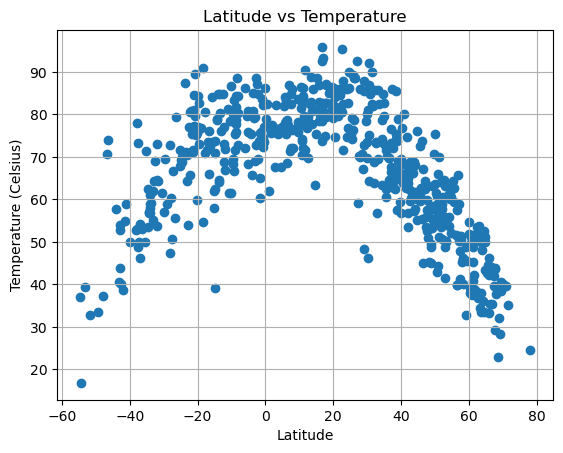

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

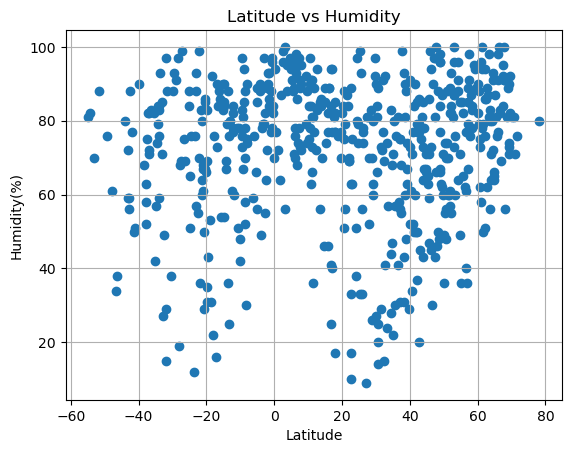

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")


# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

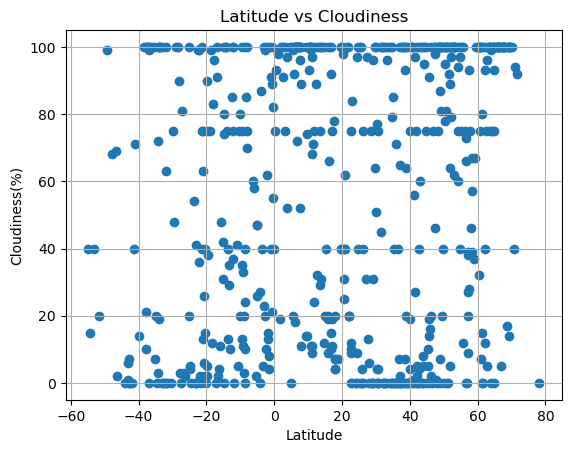

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

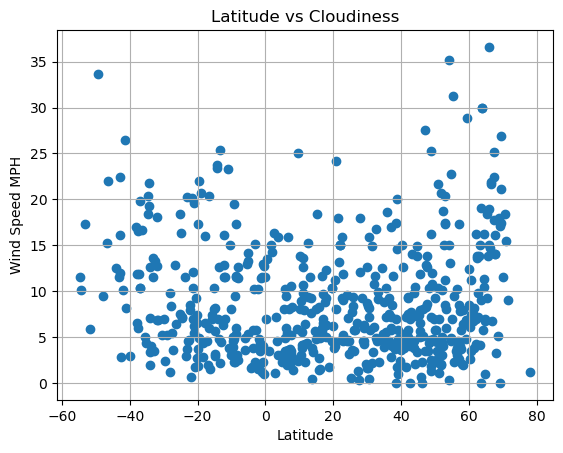

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")


# Incorporate the other graph properties

plt.title("Latitude vs Cloudiness")
plt.ylabel("Wind Speed MPH")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r-value is: {rvalue ** 2}")
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, color="red")
    plt.annotate(line_eq,(x,y),color="red",fontsize=15)
    plt.xlabel("Latitude")
    plt.ylabel(y_values.name)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df.Lat >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,62.65,84,0,5.39,US,1695171665
1,luorong,24.4058,109.6086,82.67,80,9,7.07,CN,1695171864
2,sakassou,7.4546,-5.2926,71.89,97,100,3.20,CI,1695171864
3,palikir - national government center,6.9248,158.1611,86.85,74,100,8.05,FM,1695171864
4,changyon,38.2508,125.0961,62.51,93,100,3.67,KP,1695171864


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df.Lat < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,blackmans bay,-43.0167,147.3167,52.74,59,6,22.39,AU,1695171864
7,port mathurin,-19.6833,63.4167,73.11,83,2,21.99,MU,1695171864
8,moranbah,-22.0016,148.0466,80.89,36,2,0.65,AU,1695171864
9,ushuaia,-54.8000,-68.3000,37.06,81,40,11.50,AR,1695171692
12,invercargill,-46.4000,168.3500,74.01,38,2,21.99,NZ,1695171865


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7035308648798186


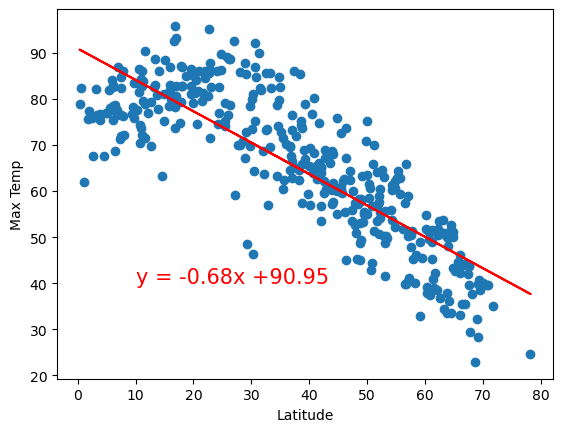

In [15]:
# Linear regression on Northern Hemisphere

x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
lin_reg(x_values, y_values, 10,40)


The r-value is: 0.49871067073472636


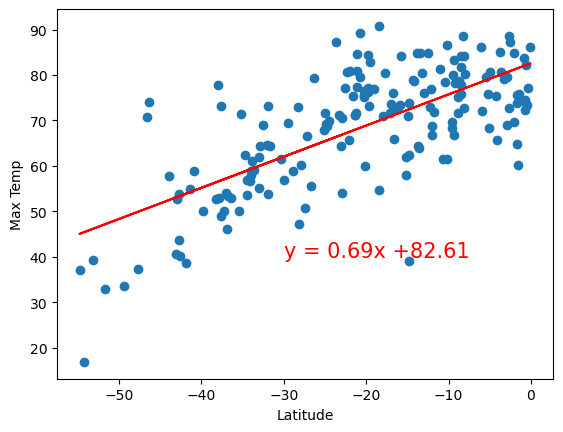

In [16]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
lin_reg(x_values, y_values, -30,40)

**Discussion about the linear relationship:** For northern and southern hemisphere there is a correlation between Max Tempature and Latitude. The closer they are to the Earth's equator the higher the tempature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00018177758846871656


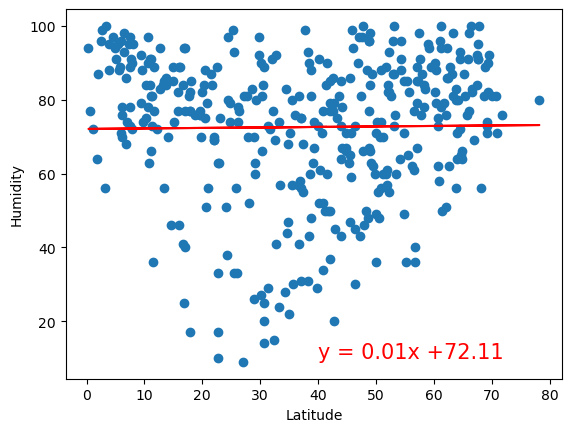

In [17]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
lin_reg(x_values, y_values, 40,10)

The r-value is: 0.024234940015432672


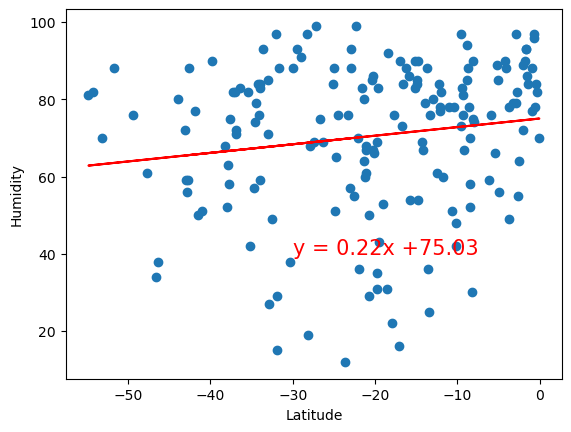

In [18]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
lin_reg(x_values, y_values, -30,40)

**Discussion about the linear relationship:** From the scatter plot you can see that there is no correlation between humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0073506852915976


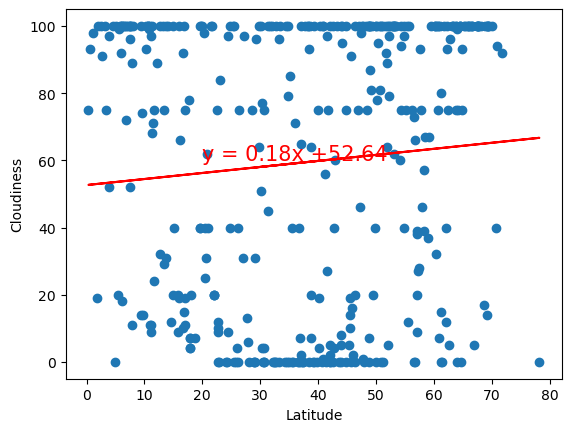

In [19]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
lin_reg(x_values, y_values, 20,60)

The r-value is: 0.004526508005138012


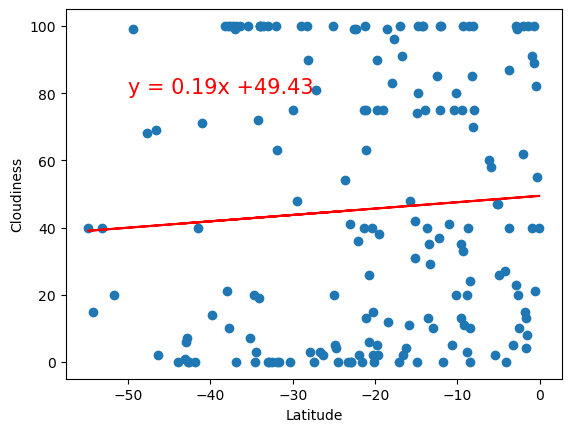

In [20]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
lin_reg(x_values, y_values, -50,80)

**Discussion about the linear relationship:** Again, from the scatter plot there is no correlation between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05947001207461762


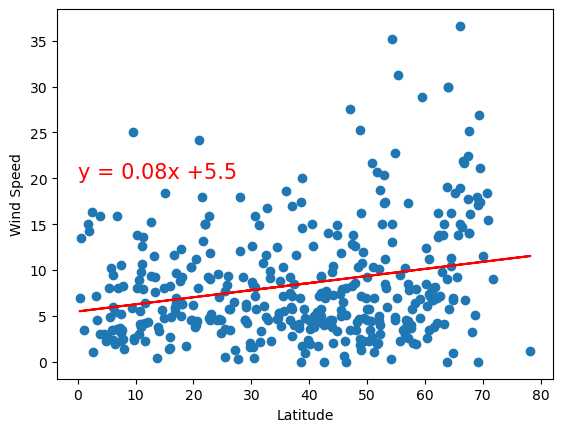

In [21]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
lin_reg(x_values, y_values, 0,20)

The r-value is: 0.08825382446973647


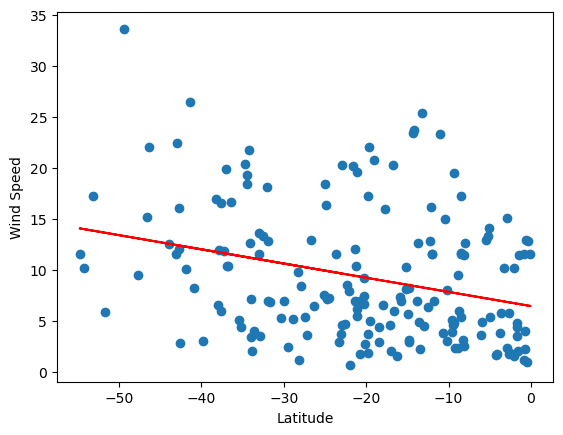

In [22]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
lin_reg(x_values, y_values, -30,40)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
And final graph, our scatter plot show there is no correlation between Wind Speed and latitude for both hemisphere.